# Loading and Listing Policy Files

In [20]:
import pandas as pd
import os

# List all policy files uploaded
policy_files = [f"policy/{state}_policy.csv" for state in [
    "Alabama", "Alaska", "American Samoa", "Arizona", "Arkansas", "California", "Colorado", "Connecticut",
    "Delaware", "DistrictofColumbia", "Florida", "Georgia", "Guam", "Hawaii", "Idaho", "Illinois",
    "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan",
    "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey",
    "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania",
    "Puerto Rico", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont",
    "Virgin Islands", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"
]]


# Loading Data into DataFrames

Now, loads each policy CSV file into a pandas DataFrame stored in a dictionary for easy manipulation and access of data by state names. ALso it prints the shape and columns of each DataFrame to ensure consistency.

In [21]:
# Load all files into a dictionary of dataframes
state_policies = {os.path.basename(file).split('_')[0]: pd.read_csv(file) for file in policy_files}

# Print the shape and column names of each dataframe to inspect consistency
for state, df in state_policies.items():
    print(f"{state}: {df.shape}, Columns: {df.columns}")
    

Alabama: (84, 14), Columns: Index(['date', 'policy', 'Restrict/Close', 'Opening (State)',
       'Deferring to County', 'Testing', 'Education', 'Health/Medical',
       'Emergency Level', 'Transportation', 'Budget', 'Social Distancing',
       'Other', 'Vaccine'],
      dtype='object')
Alaska: (65, 14), Columns: Index(['date', 'policy', 'Restrict/Close', 'Opening (State)',
       'Deferring to County', 'Testing', 'Education', 'Health/Medical',
       'Emergency Level', 'Transportation', 'Budget', 'Social Distancing',
       'Other', 'Vaccine'],
      dtype='object')
American Samoa: (35, 14), Columns: Index(['date', 'policy', 'Restrict/Close', 'Opening (State)',
       'Deferring to County', 'Testing', 'Education', 'Health/Medical',
       'Emergency Level', 'Transportation', 'Budget', 'Social Distancing',
       'Other', 'Vaccine'],
      dtype='object')
Arizona: (159, 14), Columns: Index(['date', 'policy', 'Restrict/Close', 'Opening (State)',
       'Deferring to County', 'Testing', '

# Combining Data and Initial Data Cleaning

Combining data from all states into a single DataFrame. Also handling missing files with a try-except block, avoiding crashes if a file is absent. Then this combined data is cleaned by removing unnecessary columns and handling missing values.

In [22]:
import os

# Get all policy files from the list and load them
all_policy_data = []

# Since we cannot directly list directory contents, I'm using the provided list of states to generate file paths
states = ["Alabama", "Alaska", "American Samoa", "Arizona", "Arkansas", "California", "Colorado",
          "Connecticut", "Delaware", "District of Columbia", "Florida", "Georgia", "Guam", "Hawaii",
          "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland",
          "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska",
          "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina",
          "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Puerto Rico", "Rhode Island",
          "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virgin Islands",
          "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"]

# Path to the folder containing all files
folder_path = "policy"

# Assuming all_policy_data is a list of DataFrames
all_policy_data = []

for state in states:
    file_path = os.path.join("policy", f"{state}_policy.csv")
    try:
        data = pd.read_csv(file_path)
        data['State'] = state  # Add a state column to distinguish the data
        all_policy_data.append(data)
    except FileNotFoundError:
        print(f"None")

# Concatenate all data into a single DataFrame
all_policies_df = pd.concat(all_policy_data, ignore_index=True)

# Data Cleaning Process
cleaned_policies_df = all_policies_df.drop(columns=['Unnamed: 14', 'Opening (County)'], errors='ignore')
cleaned_policies_df['date'] = pd.to_datetime(cleaned_policies_df['date'], errors='coerce', format='%d-%b-%y')


None


# Data CLeaning and Visualization

In [23]:
# Data Cleaning Process

# 1. Remove unnecessary columns
cleaned_policies_df = all_policies_df.drop(columns=['Unnamed: 14', 'Opening (County)'], errors='ignore')

# 2. Handle missing data by filling missing values with a placeholder or specific logic
# For simplicity, we'll fill categorical data with 'N/A' and others with the most frequent value or similar strategy
for column in cleaned_policies_df.columns:
    if cleaned_policies_df[column].dtype == 'object':
        cleaned_policies_df[column] = cleaned_policies_df[column].fillna('N/A')
    else:
        # For numerical columns if any (not expected here), we fill with the median or mean
        cleaned_policies_df[column] = cleaned_policies_df[column].fillna(cleaned_policies_df[column].median())

# 3. Convert date to datetime object
cleaned_policies_df['date'] = pd.to_datetime(cleaned_policies_df['date'], errors='coerce', format='%d-%b-%y')

cleaned_policies_df.head()

,date,policy,Restrict/Close,Opening (State),Deferring to County,Testing,Education,Health/Medical,Emergency Level,Transportation,Budget,Social Distancing,Other,Vaccine,State
0,2020-03-06,Governor Ivey announced the formation of a Cor...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,Y,N/A,Alabama
1,2020-03-10,Governor Ivey sent a memo to state agency head...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,Y,N/A,Alabama
2,2020-03-13,Governor Ivey issued a state of emergency for ...,N/A,N/A,N/A,N/A,N/A,N/A,Y,N/A,N/A,N/A,Y,N/A,Alabama
3,2020-03-14,Governor Ivey closed all Alabama public school...,Y,N/A,N/A,N/A,Y,N/A,N/A,N/A,N/A,N/A,N/A,N/A,Alabama
4,2020-03-15,Governor Ivey authorized directors of all stat...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,Y,N/A,Alabama


In [24]:
# Assuming 'state_policies' is a dictionary with state names as keys and DataFrames as values.

# Create a dataframe to accumulate all policy data with additional state column
all_policies = pd.DataFrame()

for state, df in state_policies.items():
    df['State'] = state
    all_policies = pd.concat([all_policies, df], ignore_index=True)

# Convert date column to datetime format for easier handling
all_policies['date'] = pd.to_datetime(all_policies['date'], errors='coerce')

# Group by date and state and count the number of policies
policy_counts = all_policies.groupby([all_policies['date'].dt.to_period('M'), 'State']).size().unstack().fillna(0)

# Calculate monthly average and standard deviation for each state
monthly_stats = policy_counts.agg(['mean', 'std'])

C:\Users\varsh\AppData\Local\Temp\ipykernel_12648\1651086562.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_policies['date'] = pd.to_datetime(all_policies['date'], errors='coerce')


In [25]:
# Find outliers: months where policy count is more than 2 standard deviations from the monthly mean
outliers = pd.DataFrame()
for state in policy_counts.columns:
    state_mean = monthly_stats.loc['mean', state]
    state_std = monthly_stats.loc['std', state]
    
    # Define an outlier threshold, e.g., mean + 2*std
    outlier_threshold_upper = state_mean + 2 * state_std
    outlier_threshold_lower = state_mean - 2 * state_std
    
    # Detect where the policy count is either above the upper threshold or below the lower threshold
    state_outliers = policy_counts[state][(policy_counts[state] > outlier_threshold_upper) | 
                                          (policy_counts[state] < outlier_threshold_lower)]
    
    # Store the outliers in a DataFrame
    outliers[state] = state_outliers

# If there are any outliers, print them out; otherwise, indicate none were found
if not outliers.dropna(how='all').empty:
    print("Outliers found:")
    print(outliers.dropna(how='all'))
else:
    print("No outliers found.")

Outliers found:
         Alabama  Alaska  American Samoa  Arizona  Arkansas  California  \
date                                                                      
2020-03     21.0    17.0             7.0     34.0      34.0        41.0   
2020-04     13.0    13.0             NaN     30.0      21.0        47.0   

         Colorado  Connecticut  Delaware  DistrictofColumbia  ...  Tennessee  \
date                                                          ...              
2020-03      43.0         61.0      23.0                16.0  ...       23.0   
2020-04      36.0         54.0       NaN                14.0  ...       39.0   

         Texas  Utah  Vermont  Virgin Islands  Virginia  Washington  \
date                                                                  
2020-03   54.0  23.0     20.0             NaN       NaN        39.0   
2020-04   42.0  20.0     17.0            33.0      24.0        36.0   

         West Virginia  Wisconsin  Wyoming  
date                            

In [26]:
# Create a dataframe to accumulate all policy data with an additional state column
all_policies = pd.DataFrame()

for state, df in state_policies.items():
    df['State'] = state
    all_policies = pd.concat([all_policies, df], ignore_index=True)

# Convert the date column to datetime format for easier handling
all_policies['date'] = pd.to_datetime(all_policies['date'], errors='coerce')

# Group by date and state and count the number of policies
policy_counts = all_policies.groupby([all_policies['date'].dt.to_period('M'), 'State']).size().unstack().fillna(0)

C:\Users\varsh\AppData\Local\Temp\ipykernel_12648\282810533.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_policies['date'] = pd.to_datetime(all_policies['date'], errors='coerce')


In [27]:
# Assuming you have already set up 'all_policies_df' as shown in previous examples
# Making sure 'date' is in the correct datetime format
all_policies_df['date'] = pd.to_datetime(all_policies_df['date'], errors='coerce')

# Create a new column 'month_year' for grouping by month and year
all_policies_df['month_year'] = all_policies_df['date'].dt.to_period('M')

C:\Users\varsh\AppData\Local\Temp\ipykernel_12648\3056570578.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_policies_df['date'] = pd.to_datetime(all_policies_df['date'], errors='coerce')


# Data Visualization

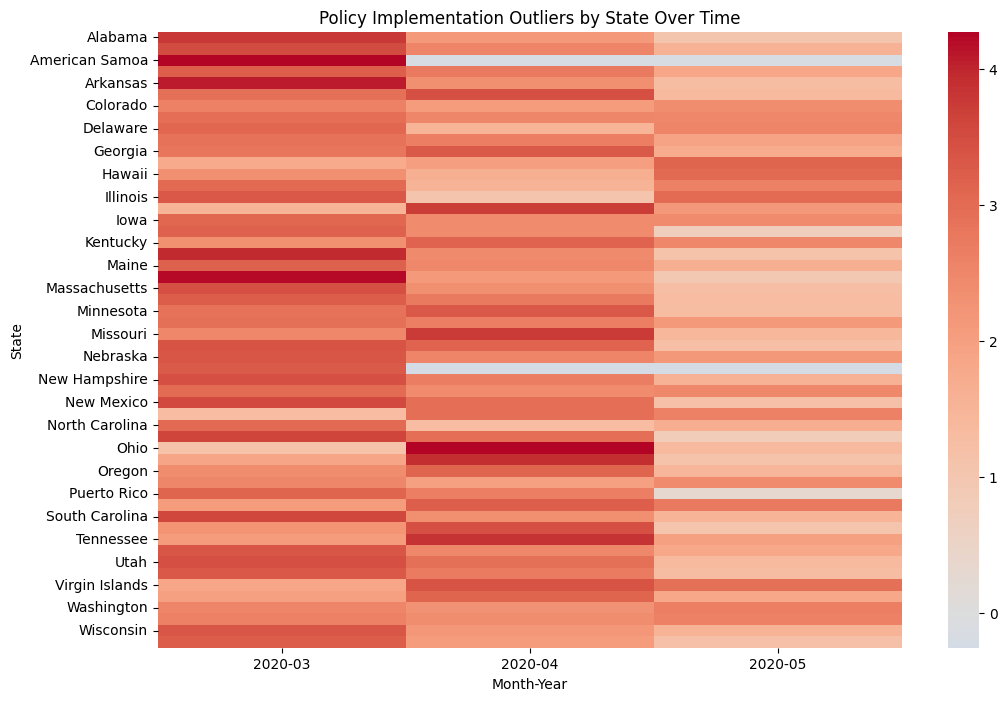

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count policies per state per month
policy_counts = all_policies_df.groupby(['month_year', 'State']).size().unstack(fill_value=0)

# Calculate the z-scores to identify outliers
policy_z_scores = (policy_counts - policy_counts.mean()) / policy_counts.std()

# Plotting states with high outliers
high_outliers = policy_z_scores[(policy_z_scores > 2).any(axis=1)]  # Filter months where any state had z-score > 2
plt.figure(figsize=(12, 8))
sns.heatmap(high_outliers.transpose(), cmap='coolwarm', center=0)
plt.title('Policy Implementation Outliers by State Over Time')
plt.ylabel('State')
plt.xlabel('Month-Year')
plt.show()

The visualization of policy data across U.S. states provides comprehensive insights into the dynamics of policy implementation. The significant outliers in policy activities, highlighting states and periods with unusual levels of regulatory changes are found. These findings, visualized through heatmaps offer a clear, dual perspective on temporal and geographical deviations in policy enforcement. This analysis can be helpful for policymakers and analysts, since it points specific areas and times that might require closer scrutiny or immediate intervention, potentially guiding more effective policy planning and implementation strategies.